[Tutorial on jupyter, python, and data](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)

[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="darkgrid")


In [79]:
from numbers_parser import Document
doc = Document('../Pilot/User2_Exp-a.numbers')
sheets = doc.sheets
tables = sheets[0].tables
data = tables[0].rows(values_only=True)
df = pd.DataFrame(data[1:], columns=data[0])

sheets = doc.sheets
tables = sheets[0].tables
data = tables[0].rows(values_only=True)
df = pd.DataFrame(data[1:], columns=data[0])
df.tail()


,Trial,SoundSpeed,SoundAngle,MovSpeed,MovAngle,soundStart,startDragTime,endDragTime,randomHorizontalInterval,randomVerticalInterval
35,35.0,91.5118070530211,195.13129476063628,115.71641562661935,200.21026921515724,1.736416e+12,1.736416e+12,1.736416e+12,339.60042899240364,1255.8873689411023
36,36.0,49.58064927223298,118.9296189912987,67.2465345567919,108.06047193619918,1.736416e+12,1.736416e+12,1.736416e+12,1250.8396325011922,691.3444843226517
37,37.0,51.028149028102106,307.3683159235265,50.40488231520703,298.0202891554139,1.736416e+12,1.736416e+12,1.736416e+12,968.6529932320495,739.7427189817773
38,38.0,87.48530712100019,291.0471386498739,186.21913942801547,283.54110708205144,1.736416e+12,1.736416e+12,1.736416e+12,954.8327448667382,367.4275537763923
39,39.0,27.67276275811414,136.1131921378667,44.79821210634681,129.9575489308291,1.736416e+12,1.736416e+12,1.736416e+12,1504.2074574728488,1563.8233240600264


In [3]:
df.dtypes

Trial                        float64
 SoundSpeed                   object
 SoundAngle                   object
 MovSpeed                     object
 MovAngle                     object
 soundStart                  float64
 startDragTime               float64
 endDragTime                 float64
 randomHorizontalInterval     object
 randomVerticalInterval       object
dtype: object

In [21]:
df = pd.read_csv('../Pilot/User1_Exp-a.csv')
print(len(df))
df.tail()


40


,Trial,SoundSpeed,SoundAngle,MovSpeed,MovAngle,soundStart,startDragTime,endDragTime,randomHorizontalInterval,randomVerticalInterval
35,35,86.049308,256.404930,237.828003,260.197503,1736414268676,1736414272178,1736414272993,1483.193920,358.687298
36,36,34.374375,36.589152,183.459970,25.513870,1736414276993,1736414280263,1736414281326,1086.947509,1464.155119
37,37,87.215698,161.854154,231.198899,155.286823,1736414285327,1736414288538,1736414289376,361.977035,1104.476647
38,38,33.915986,47.941262,256.692222,30.613481,1736414293377,1736414297111,1736414297876,1320.419548,1191.364456
39,39,35.520367,307.871486,137.491620,337.813322,1736414301877,1736414309253,1736414310659,1375.788056,1069.922580


In [65]:
# df = pd.read_csv('../Pilot/2025-01-14T15-55-14-615Z.csv')
df = pd.read_csv('../Pilot/2025-01-09T07-48-33-663Z.csv')
print(len(df))
df.tail()

40


,Trial,SoundSpeed,SoundAngle,MovSpeed,MovAngle,soundStart,startDragTime,endDragTime,randomHorizontalInterval,randomVerticalInterval
35,35,127.141307,171.203652,216.050515,162.210870,1736408853212,1736408860119,1736408861028,238.766270,1542.986706
36,36,112.501029,121.418202,239.098546,125.331331,1736408865029,1736408872835,1736408873645,511.555856,312.478133
37,37,33.016072,230.044870,72.593569,244.093492,1736408877645,1736408882965,1736408885645,1414.926912,1185.377625
38,38,31.772880,322.767203,77.889960,298.940013,1736408889645,1736408896901,1736408899395,1185.909071,1560.521840
39,39,73.084702,72.978788,129.046819,63.829180,1736408903395,1736408908150,1736408909661,1402.277236,429.286911


In [80]:
df.columns = ['trial', 'soundSpeed', 'soundAngle', 'movSpeed', 'movAngle', 'soundStart', 'startDragTime', 'endDragTime', 'hInterval', 'vInterval']

In [7]:
df.dtypes

trial              int64
soundSpeed       float64
soundAngle       float64
movSpeed         float64
movAngle         float64
soundStart         int64
startDragTime      int64
endDragTime        int64
hInterval        float64
vInterval        float64
dtype: object

In [81]:
def categorize_angles_into_quadrants(df, angle_column='angle_degrees', quadrant_column='quadrant'):
    """
    Transforms angles in degrees into quadrants (I, II, III, IV) and adds a 
    new column with the quadrant information to the DataFrame.

    Args:
        df: Pandas DataFrame containing an angle column.
        angle_column: Name of the column containing angles in degrees.  Defaults to 'angle_degrees'.
        quadrant_column: Name of the new column to store quadrant information. Defaults to 'quadrant'.

    Returns:
        Pandas DataFrame with the added quadrant column.  Returns the original DataFrame if the angle column is not found.
        Prints an error message if the angle column is not found.
    """

    if angle_column not in df.columns:
        print(f"Error: Angle column '{angle_column}' not found in DataFrame.")
        return df

    df[quadrant_column] = np.nan  # Initialize with NaN (for consistency with NaN angles)

    # Handle NaN angles directly
    nan_mask = df[angle_column].isna()

    # Vectorized operations for non-NaN angles
    valid_mask = ~nan_mask  # Invert the NaN mask

    angles = df.loc[valid_mask, angle_column].astype(float) % 360  # Vectorized modulo

    df.loc[valid_mask & (angles < 90), quadrant_column] = 'I'
    df.loc[valid_mask & (angles >= 90) & (angles < 180), quadrant_column] = 'II'
    df.loc[valid_mask & (angles >= 180) & (angles < 270), quadrant_column] = 'III'
    df.loc[valid_mask & (angles >= 270), quadrant_column] = 'IV'


    return df

In [90]:
def detect_flips(df, quadrant1_col, quadrant2_col, flip_col='flip_type'):
    """
    Detects horizontal, vertical, and double flips based on quadrant changes.

    Args:
        df: Pandas DataFrame containing two quadrant columns.
        quadrant1_col: Name of the first quadrant column.
        quadrant2_col: Name of the second quadrant column.
        flip_col: Name of the new column to store flip information. Defaults to 'flip_type'.

    Returns:
        Pandas DataFrame with the added flip_type column.  Returns original DataFrame if columns are not found.
        Prints error messages if columns are not found.
    """
    
    if quadrant1_col not in df.columns:
        print(f"Error: Quadrant column '{quadrant1_col}' not found in DataFrame.")
        return df

    if quadrant2_col not in df.columns:
        print(f"Error: Quadrant column '{quadrant2_col}' not found in DataFrame.")
        return df

    df[flip_col] = 'N'  # Initialize

    # Create boolean masks for each flip type (vectorized)
    h_mask = ((df[quadrant1_col] == 'I') & (df[quadrant2_col] == 'II')) | \
             ((df[quadrant1_col] == 'II') & (df[quadrant2_col] == 'I')) | \
             ((df[quadrant1_col] == 'III') & (df[quadrant2_col] == 'IV')) | \
             ((df[quadrant1_col] == 'IV') & (df[quadrant2_col] == 'III'))

    v_mask = ((df[quadrant1_col] == 'I') & (df[quadrant2_col] == 'IV')) | \
             ((df[quadrant1_col] == 'IV') & (df[quadrant2_col] == 'I')) | \
             ((df[quadrant1_col] == 'II') & (df[quadrant2_col] == 'III')) | \
             ((df[quadrant1_col] == 'III') & (df[quadrant2_col] == 'II'))

    b_mask = ((df[quadrant1_col] == 'I') & (df[quadrant2_col] == 'III')) | \
             ((df[quadrant1_col] == 'III') & (df[quadrant2_col] == 'I')) | \
             ((df[quadrant1_col] == 'II') & (df[quadrant2_col] == 'IV')) | \
             ((df[quadrant1_col] == 'IV') & (df[quadrant2_col] == 'II'))

    same_mask = df[quadrant1_col] == df[quadrant2_col]

    nan_mask = df[quadrant1_col].isna() | df[quadrant2_col].isna()

    # Apply masks (vectorized)
    df.loc[h_mask, flip_col] = 'H'
    df.loc[v_mask, flip_col] = 'V'
    df.loc[b_mask, flip_col] = 'B'
    df.loc[same_mask, flip_col] = 'N' # No flip if same
    df.loc[nan_mask, flip_col] = np.nan # NaN if any is NaN

    return df

In [86]:
categorize_angles_into_quadrants(df, angle_column='soundAngle', quadrant_column='soundQuadrant');

In [91]:
categorize_angles_into_quadrants(df, angle_column='movAngle', quadrant_column='movQuadrant');
detect_flips(df, 'soundQuadrant', 'movQuadrant', 'flip')

,trial,soundSpeed,soundAngle,movSpeed,movAngle,soundStart,startDragTime,endDragTime,hInterval,vInterval,soundQuadrant,movQuadrant,flip
0,0.0,46.23805760321461,234.14455193436743,154.15048656298075,252.96223220437435,1.736416e+12,1.736416e+12,1.736416e+12,1107.6819483084478,800.5161096248245,III,III,N
1,1.0,38.1889100438994,318.79249242616595,100.07569671936062,303.4445156885807,1.736416e+12,1.736416e+12,1.736416e+12,1044.1825314425228,1192.4447946977994,IV,IV,N
2,2.0,116.78459023820683,305.05322684341445,139.56313429894126,337.1519571283837,1.736416e+12,1.736416e+12,1.736416e+12,447.26899267432293,313.80074758500695,IV,IV,N
3,3.0,109.49032351629721,106.18322424006283,136.41235109352036,109.73268949966103,1.736416e+12,1.736416e+12,1.736416e+12,983.0895446683757,285.3018053785178,II,II,N
4,4.0,57.37773915448465,22.86769930832969,87.77212105743894,11.949757221493826,1.736416e+12,1.736416e+12,1.736416e+12,567.4497814633798,1345.4573104892845,I,I,N
5,5.0,37.56710670583064,138.3932452959399,76.10338285620824,149.2372804657611,1.736416e+12,1.736416e+12,1.736416e+12,1068.0082737051712,1202.6410675491156,II,II,N
6,6.0,158.54971449764844,111.76171840916709,148.85632346237927,152.64106273344657,1.736416e+12,1.736416e+12,1.736416e+12,510.3612388029085,203.73449380923256,II,II,N
7,7.0,58.14871493121749,61.97185266248795,91.9979033529643,43.53119928561421,1.736416e+12,1.736416e+12,1.736416e+12,1097.9203153900278,584.4666236387261,I,I,N
8,8.0,37.66841759646475,131.3442678366289,49.31080626267025,225.62959860841028,1.736416e+12,1.736416e+12,1.736416e+12,1205.638756711896,1060.8310811185493,II,III,V
9,9.0,63.6986527184426,326.803301473059,71.04486897733831,347.2478802497924,1.736416e+12,1.736416e+12,1.736416e+12,562.8225419175299,860.1911710819804,IV,IV,N


In [18]:
df.tail()

,trial,soundSpeed,soundAngle,movSpeed,movAngle,soundStart,startDragTime,endDragTime,hInterval,vInterval,soundQuadrant
35,35,33.058585,317.974868,39.266439,297.358937,1736870038407,1736870048332,1736870053264,1221.617203,1355.547142,IV
36,36,97.348868,137.077432,86.269118,132.492298,1736870057764,1736870061441,1736870063689,420.839315,452.519473,II
37,37,90.512930,257.292681,79.308438,254.744881,1736870068189,1736870072719,1736870075163,1506.765125,339.766445,III
38,38,47.445250,152.970352,96.186398,154.221569,1736870079664,1736870091257,1736870093289,709.842848,1391.364673,II
39,39,30.919454,317.330246,26.938481,317.090159,1736870097790,1736870102917,1736870110114,1319.596421,1431.548485,IV


(array([10., 10.,  6.,  4.,  3.,  2.,  0.,  1.,  2.,  2.]),
 array([ 29.34595998,  41.08614766,  52.82633535,  64.56652304,
         76.30671073,  88.04689841,  99.7870861 , 111.52727379,
        123.26746147, 135.00764916, 146.74783685]),
 <BarContainer object of 10 artists>)

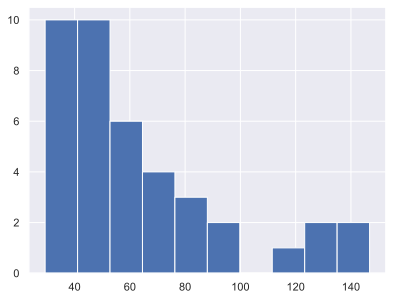

In [8]:
plt.hist(df.soundSpeed)

(array([11.,  4.,  2.,  6.,  2.,  0.,  2.,  3.,  7.,  3.]),
 array([ 19.32687176,  52.49382083,  85.66076989, 118.82771895,
        151.99466802, 185.16161708, 218.32856614, 251.4955152 ,
        284.66246427, 317.82941333, 350.99636239]),
 <BarContainer object of 10 artists>)

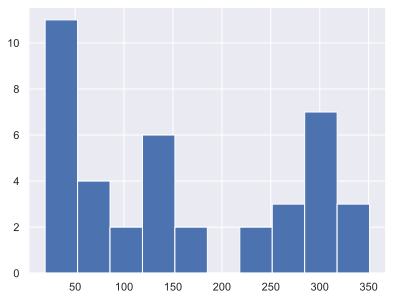

In [9]:
plt.hist(df.soundAngle)

In [10]:
errAngle = df.movAngle - df.soundAngle

(array([ 1.,  3.,  2.,  6., 10.,  7.,  6.,  2.,  1.,  2.]),
 array([-30.39683481, -25.20068335, -20.0045319 , -14.80838044,
         -9.61222898,  -4.41607753,   0.78007393,   5.97622539,
         11.17237685,  16.3685283 ,  21.56467976]),
 <BarContainer object of 10 artists>)

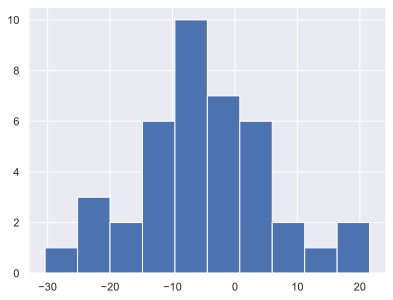

In [11]:
plt.hist(errAngle)

(array([ 1.,  1.,  2.,  6., 12., 11.,  1.,  2.,  2.,  2.]),
 array([-48.74114816, -36.60113579, -24.46112341, -12.32111104,
         -0.18109867,  11.9589137 ,  24.09892607,  36.23893844,
         48.37895082,  60.51896319,  72.65897556]),
 <BarContainer object of 10 artists>)

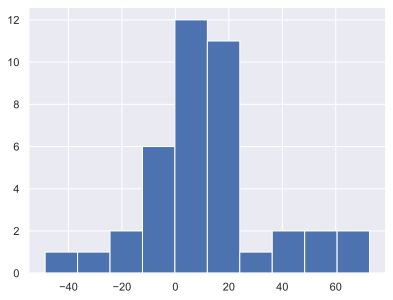

In [12]:
errSpeed = df.soundSpeed - df.movSpeed
plt.hist(errSpeed)

Text(0.5, 1.0, 'start drag time as a function of angle error')

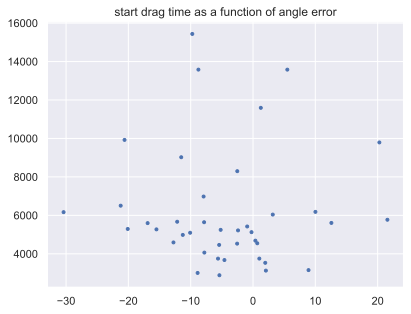

In [13]:
fig, ax = plt.subplots()
ax.plot(errAngle, df.startDragTime-df.soundStart, '.')
ax.set_title('start drag time as a function of angle error')
# ax.plot(df.soundAngle, df.startDragTime-df.soundStart, '.')
# ax.set_title('start drag time as a function of sound angle')
